In [3]:
import math
import blackbox
from multiprocessing import Pool

creating thread


## Code that generated the plots below
1. This code was run
2. This code was commented out
3. This notebook was run again to generate the plots *without* generating the data again

In [2]:
#@blackbox.record
def newton(x):
     '''
     Compute the square root of x.
     '''
     xi = 1
     true_root = math.sqrt(x)
     for i in range(0,20):
         xi = .5*(xi+x/xi)
         blackbox.log('iter', i)
         blackbox.log('xi', xi)
         error(xi, true_root)
         blackbox.save(verbose=True)
     return xi
 
def error(x,y):
    '''
    compute the error
    '''
    err = abs(x-y)
    blackbox.log('error', err)
 
def test_par_runs(i):
    blackbox.takeoff(name='Newtons method worker:{}'.format(i), description='sample run', force=True)    
    r = newton(i)
    blackbox.land()
    return r

In [3]:
blackbox.set_experiment('SquareRootParallel')
pool = Pool(4)
result  = pool.map(test_par_runs, [2, 20, 200, 2000])
pool.close()

State Saved: timestamp: 1478525734.91 xi: 100.5 iter: 0 error: 86.3578643763
State Saved: timestamp: 1478525734.92 xi: 1000.5 iter: 0 error: 955.77864045
State Saved: timestamp: 1478525734.92 xi: 501.24950025 iter: 1 error: 456.5281407
State Saved: timestamp: 1478525734.92 xi: 51.2450248756 iter: 1 error: 37.1028892519
State Saved: timestamp: 1478525734.91 xi: 1.5 iter: 0 error: 0.0857864376269
State Saved: timestamp: 1478525734.91 xi: 10.5 iter: 0 error: 6.027864045
State Saved: timestamp: 1478525734.92 xi: 252.619764583 iter: 2 error: 207.898405033
State Saved: timestamp: 1478525734.92 xi: 27.5739213842 iter: 2 error: 13.4317857605
State Saved: timestamp: 1478525734.92 xi: 6.20238095238 iter: 1 error: 1.73024499738
State Saved: timestamp: 1478525734.92 xi: 1.41666666667 iter: 1 error: 0.00245310429357
State Saved: timestamp: 1478525734.92 xi: 130.268400746 iter: 3 error: 85.5470411956
State Saved: timestamp: 1478525734.93 xi: 17.4135758045 iter: 3 error: 3.27144018076
State Saved: ti

## Getting the data
We want to have all the data points represented by a list of dictionaries.

We want to update these dictionaries to include the experiment but that's it.

In [4]:
import pandas as pd
exp = blackbox.get_experiment('SquareRootParallel')
print exp.list_runs()

runs = []
for key in exp.list_runs():
    run = exp.get_run(key).events
    _ = [r.update({'experiment': key}) for r in run]
    runs += run
    
df = pd.DataFrame(runs)

['Newtons method worker:2000', 'Newtons method worker:200', 'Newtons method worker:20', 'Newtons method worker:2']


In [5]:
import pandas as pd
df = pd.DataFrame(runs)
df.head()

,error,experiment,iter,timestamp,xi
0,955.778640,Newtons method worker:2000,0.0,1.478526e+09,1000.500000
1,456.528141,Newtons method worker:2000,1.0,1.478526e+09,501.249500
2,207.898405,Newtons method worker:2000,2.0,1.478526e+09,252.619765
3,85.547041,Newtons method worker:2000,3.0,1.478526e+09,130.268401
4,28.089300,Newtons method worker:2000,4.0,1.478526e+09,72.810659


## Plotting
We show plotting with

1. altair (the preferred tool)
2. altair_widgets which allows interactive exploration of the data
2. pandas
3. matplotlib 

### Altair
The main advantage of altair is that it's an *imperative* API not a *declarative* API. You tell Altair *what* to plot, not *how* to plot.

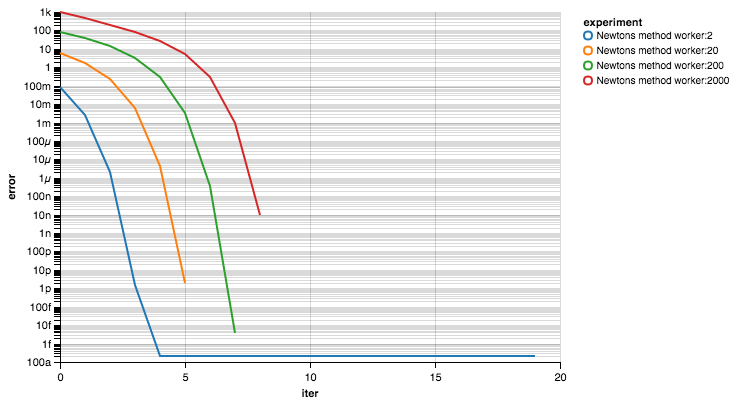

In [6]:
from altair import Chart, Y, Scale

Chart(df).mark_line().encode(
    x='iter', y=Y('error', scale=Scale(type='log')), color='experiment'
)

### `altair_widgets`
Note: the cell below has to be run to be viewed (GitHub can't parse it for security).

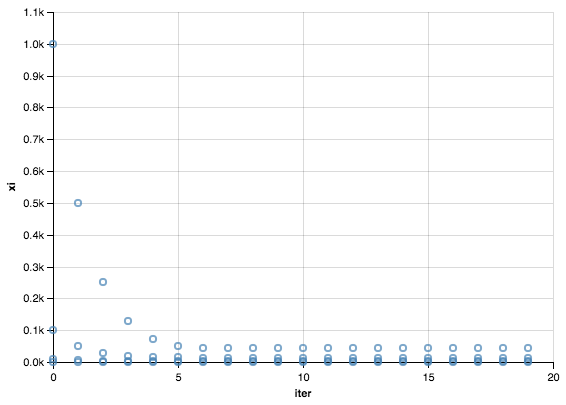

In [7]:
import altair_widgets as w

w.interact_with(df)

### Pandas
I've touched pandas plotting but am no expert.

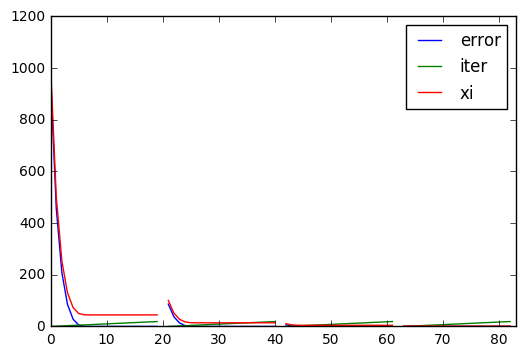

In [12]:
import matplotlib.pyplot as plt
if 'timestamp' in df.keys():
    del df['timestamp']
df.plot()#x='iter')
plt.show()

### matplotlib

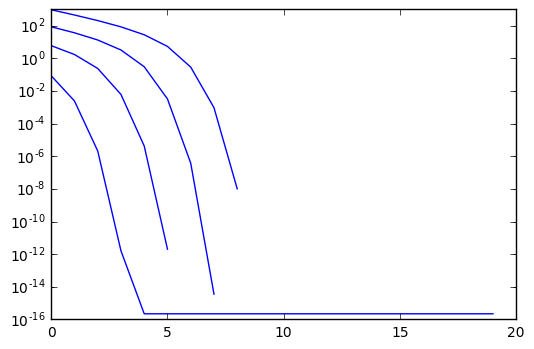

In [11]:
plt.figure()
plt.semilogy(df['iter'], df['error'])
plt.show()